In [1]:
NAME = "Anthony Kontos"

# Car Price Linear Regression

In this analysis we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


In [4]:
## Create dummy variables for the Fuel_Type, Transmission 
## and Seller_Type variables.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

df = pd.read_csv('car_data.csv', header = 0, sep = ',')
car_dummies=pd.get_dummies(data = df, columns = ['Fuel_Type', 'Transmission', 'Seller_Type'])

df.info()
car_dummies.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,0,0,1,0,0,1,1,0


In [6]:
## Create a new column which captures the age of the car 
## as 'new' or 'old'.

df['Current']= 2021
df['Age']= df['Current']-df['Year']

df.loc[df['Age'] >= 8, 'New_or_Old'] = 'Old'
df.loc[df['Age'] < 8, 'New_or_Old'] = 'New'

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current,Age,New_or_Old
0,ritz,2014,3.35,5.59,27.00,Petrol,Dealer,Manual,0,2021,7,New
1,sx4,2013,4.75,9.54,43.00,Diesel,Dealer,Manual,0,2021,8,Old
2,ciaz,2017,7.25,9.85,6.90,Petrol,Dealer,Manual,0,2021,4,New
3,wagon r,2011,2.85,4.15,5.20,Petrol,Dealer,Manual,0,2021,10,Old
4,swift,2014,4.60,6.87,42.45,Diesel,Dealer,Manual,0,2021,7,New


In [5]:
## Scale the Kms_Driven, Selling_Price, and Present_Price variables
## (i.e. ensure the variables have the same scale - thousands or tens. 
## You can choose whichever scale you prefer).

## thousands

df[['Kms_Driven']] =  df[['Kms_Driven']] / 1000
df[['Kms_Driven', 'Selling_Price', 'Present_Price']].head()



<bound method NDFrame.head of      Kms_Driven  Selling_Price  Present_Price
0        27.000           3.35           5.59
1        43.000           4.75           9.54
2         6.900           7.25           9.85
3         5.200           2.85           4.15
4        42.450           4.60           6.87
..          ...            ...            ...
296      33.988           9.50          11.60
297      60.000           4.00           5.90
298      87.934           3.35          11.00
299       9.000          11.50          12.50
300       5.464           5.30           5.90

[301 rows x 3 columns]>

C:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\antho\anaconda3\lib\si

1

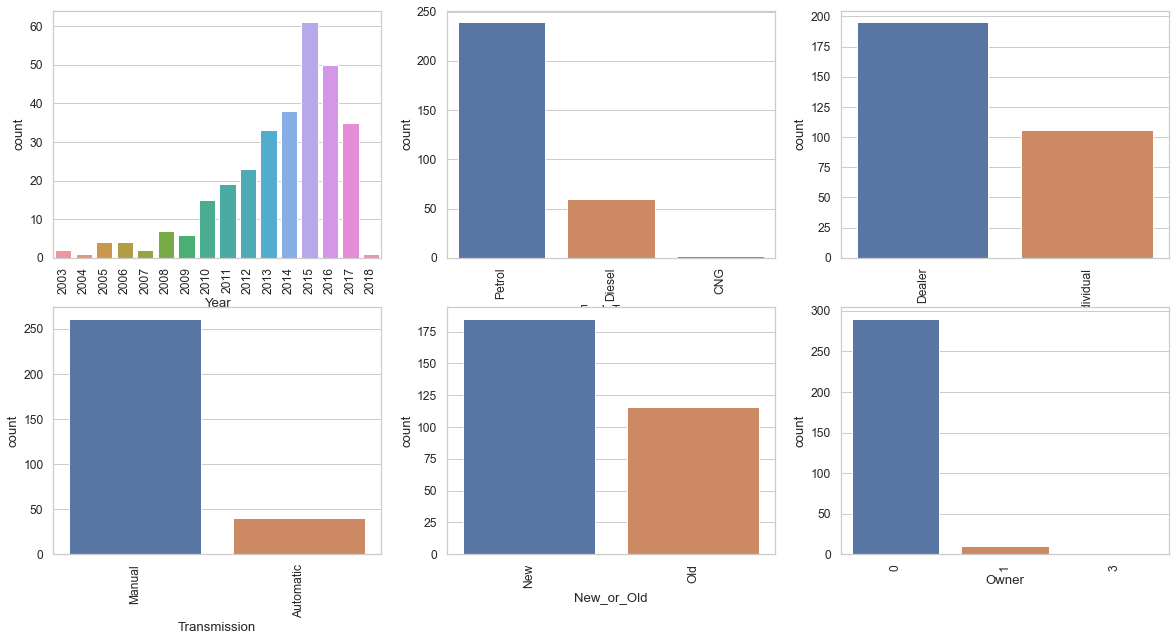

In [143]:
## conduct exploratory analysis for the categorical variables

numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven']
categorical = ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'New_or_Old', 'Owner']

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

df['Year'].value_counts().idxmax()
df['Year'].value_counts().max()

df['Owner'].value_counts().idxmin()
df['Owner'].value_counts().min()

## Most cars were bought between 2013 - 2017 -- 2015 being the most prevalent Car Year
## The ratio of cars with 0 previous owners to 1 previous owner was ~27:1 and no cars had 2 previous owners but only one had 3
## Extremely old and extremely new cars -- cars from 2004 and 2018 specifically -- have the lowest count, 1
## Around twice as many cars are under 8 years old than over. 
## The ratio of Petrol to Diesel vehicles is approximately 4:1, very few cars take CNG fuel
## The ratio of Manual to Automatic vehicles is approximately 13:2, European cars are overhwelmingly manual
## The ratio of Dealer to Individually sold vehicles is approximately 2:1, people prefer to buy from dealers 

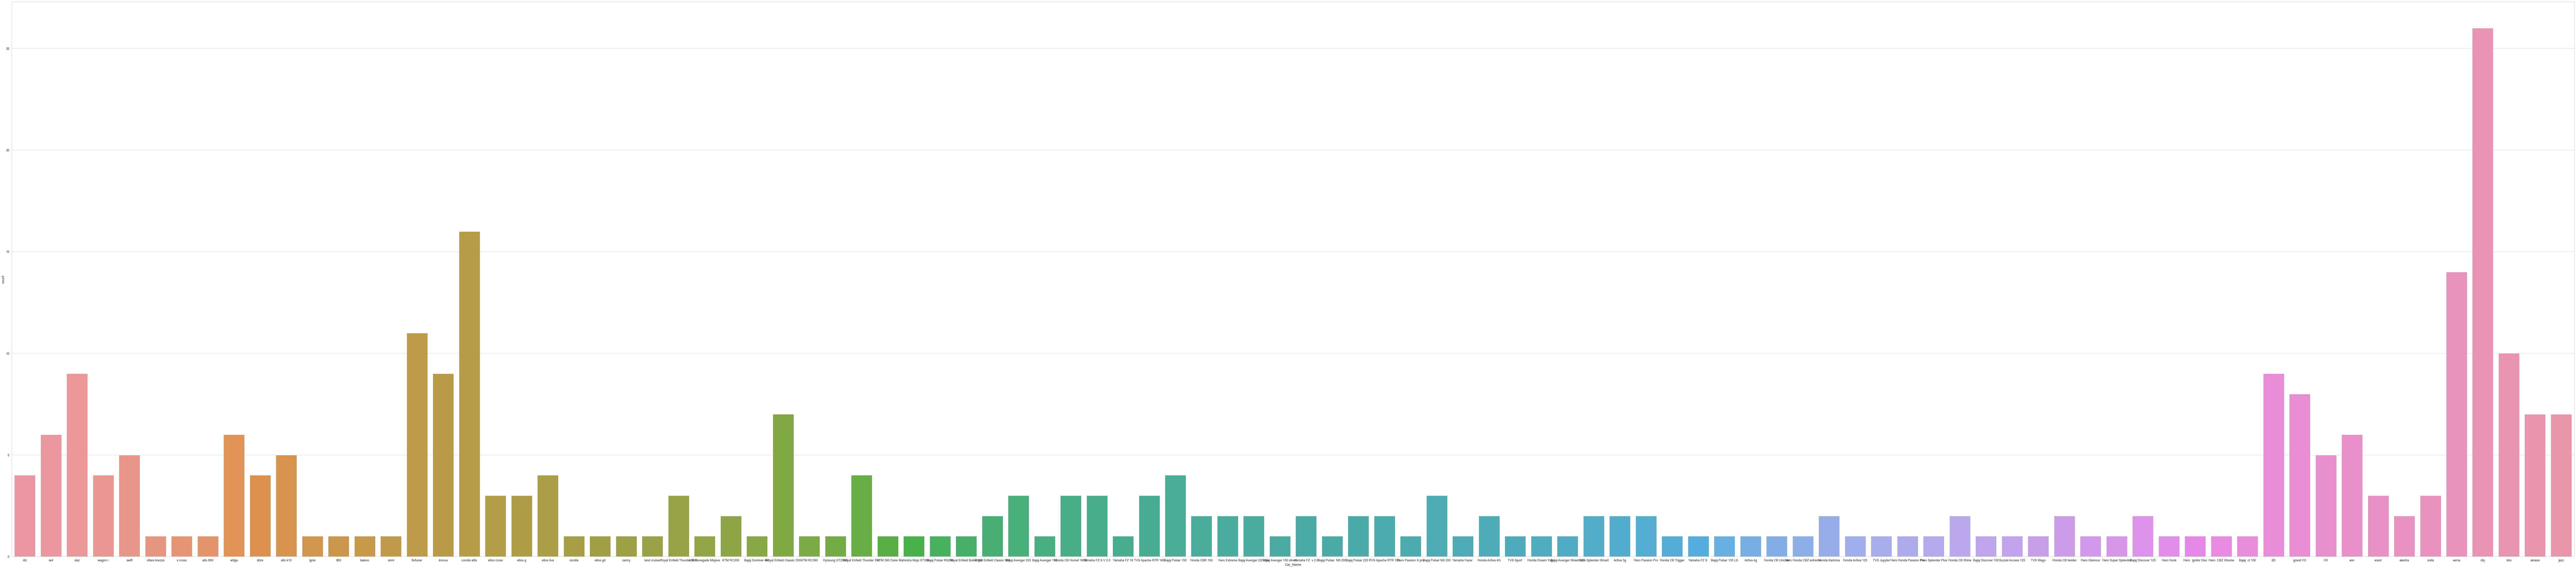

In [144]:
plt.figure(figsize=(180,40))
sns.countplot(x='Car_Name', data = df)
plt.show()

## the car called 'city' was most prevelant in the data

In [145]:
## Conduct exploratory analysis for the numerical variables.Ensure you review each variable by itself, 
## and in combination with the other variables to identify insights and trends. What are your findings?

category_analysis = pd.DataFrame(df.groupby(['Fuel_Type', 'Seller_Type', 'Transmission', 'New_or_Old'])[['Selling_Price', 'Present_Price', 'Kms_Driven']].mean())
category_analysis

## diesel vehicles sold by individual sellers have the most kms driven of all groups, perhaps because diesel vehicles
## appeal to long distance drivers who rely on disel to travel on a single tank. On the other hand Manual drivers of Petrol
## vehicles have the least Kms_Driven -- likely because manual transmission vehicles are not as common anymore and appeal
## more to car enthusiasts rather than everyday drivers. 

##In the case of diesel vehicles, there is a clear preference for older vehicles



Selling_Price  Present_Price  \
Fuel_Type Seller_Type Transmission New_or_Old                                 
CNG       Dealer      Manual       New              3.250000       5.090000   
                                   Old              2.950000       7.740000   
Diesel    Dealer      Automatic    New             22.554444      30.653333   
                                   Old             14.700000      30.610000   
                      Manual       New              7.900909      10.300606   
                                   Old              7.172667      16.082667   
          Individual  Automatic    Old             16.000000      30.610000   
Petrol    Dealer      Automatic    New              8.581818      10.836364   
                                   Old              4.051429      13.885714   
                      Manual       New              5.943571       8.139000   
                                   Old              3.587174       8.817609   
          Individual  Automatic    New              0.413333       0.526667   
                                   Old              0.792500       6.337500   
                      Manual       New              0.906182       1.211509   
                                   Old              0.520750       1.189675   

                                               Kms_Driven  
Fuel_Type Seller_Type Transmission New_or_Old              
CNG       Dealer      Manual       New          35.500000  
                                   Old          49.998000  
Diesel    Dealer      Automatic    New          34.555556  
                                   Old          96.853500  
                      Manual       New          43.587727  
                                   Old          62.939533  
          Individual  Automatic    Old         135.000000  
Petrol    Dealer      Automatic    New          24.678182  
                                   Old          70.336000  
                      Manual       New          24.308414  
                                   Old          50.710478  
          Individual  Automatic    New           8.850000  
                                   Old         166.475000  
                      Manual       New          16.014545  
                                   Old          40.388325

In [149]:
df['unique_id'] = df.Selling_Price.map(hash)

SellingPriceBins = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23', '24-27', '27+']
df['SellingPriceGroup'] = pd.cut(df.Selling_Price, [0,3,7,11,15,19,23,27,float("inf")], labels=SellingPriceBins)       
    
df.groupby(['New_or_Old', 'SellingPriceGroup'])['unique_id'].count()

## Most cars -- new or old -- have a current used value between 0 and 7k euros
## However there are significantly more newer used cars worth 7k+ than older cars worth the same amount

New_or_Old  SellingPriceGroup
New         0-3                  67
            4-7                  65
            8-11                 32
            12-15                10
            16-19                 3
            20-23                 6
            24-27                 1
            27+                   1
Old         0-3                  68
            4-7                  40
            8-11                  4
            12-15                 2
            16-19                 1
            20-23                 0
            24-27                 0
            27+                   1
Name: unique_id, dtype: int64

In [150]:
KmsDrivenBins = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '140+']
df['KmsGroup'] = pd.cut(df.Kms_Driven, [0,20,40,60,80,100,120,140,float("inf")], labels=KmsDrivenBins)       
    
df.groupby(['New_or_Old', 'KmsGroup'])['unique_id'].count()

## Older cars have more kms driven than newer cars as we should expect

New_or_Old  KmsGroup
New         0-20        85
            21-40       60
            41-60       32
            61-80        7
            81-100       1
            101-120      0
            121-140      0
            140+         0
Old         0-20        16
            21-40       27
            41-60       42
            61-80       17
            81-100       6
            101-120      1
            121-140      3
            140+         4
Name: unique_id, dtype: int64

In [154]:
PresentPriceBins = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23', '24-27', '27+']
df['PresentPriceGroup'] = pd.cut(df.Present_Price, [0,3,7,11,15,19,23,27,float("inf")], labels=CurrentPriceBins)       
    
df.groupby(['New_or_Old', 'PresentPriceGroup'])['unique_id'].count()

## Newer cars are generally more costly than older cars when sold brand new however
## a few more older cars than newer cars sell for 16-27k euros, possibly due to rarity or vintageness

New_or_Old  PresentPriceGroup
New         0-3                  59
            4-7                  42
            8-11                 48
            12-15                23
            16-19                 2
            20-23                 2
            24-27                 3
            27+                   6
Old         0-3                  43
            4-7                  25
            8-11                 25
            12-15                 7
            16-19                 7
            20-23                 4
            24-27                 1
            27+                   4
Name: unique_id, dtype: int64

In [151]:
df.groupby(['New_or_Old', 'KmsGroup', 'SellingPriceGroup'])['unique_id'].count()

## As kms driven increase, sellling price decreases -- the biggest drop occuring past 40k kms driven for New cars
## In old cars there is more variability or more anomalies due to the fact that cars might become more rare, more 'vintage', and thus worth more

New_or_Old  KmsGroup  SellingPriceGroup
New         0-20      0-3                  46
                      4-7                  20
                      8-11                 11
                      12-15                 3
                      16-19                 2
                      20-23                 2
                      24-27                 0
                      27+                   1
            21-40     0-3                  16
                      4-7                  27
                      8-11                 10
                      12-15                 4
                      16-19                 0
                      20-23                 3
                      24-27                 0
                      27+                   0
            41-60     0-3                   5
                      4-7                  15
                      8-11                  8
                      12-15                 2
                      16-19             

C:\Users\antho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


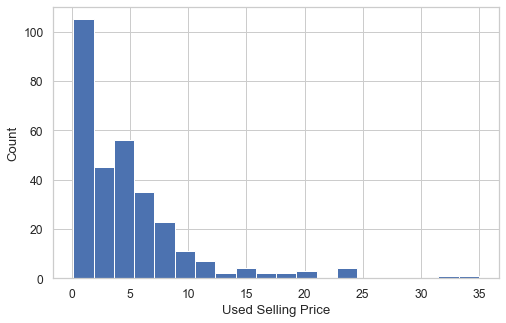

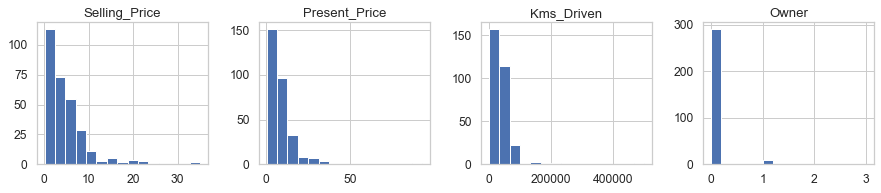

In [44]:
## f

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Selling_Price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Used Selling Price', ylabel='Count');

df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));


In [ ]:
#Based on the insights identified, state a hypothesis which you can test with a regression model.

## The more kms driven on a car and the greater the age the more its value as a used car decreases

In [159]:
results.params

const         8.136166
Age          -0.609591
Kms_Driven    0.027582
dtype: float64

In [160]:
from statsmodels.formula.api import ols
results2=ols("Selling_Price ~ Age + Kms_Driven",data=df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.39
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.09e-06
Time:                        23:49:52   Log-Likelihood:                -902.11
No. Observations:                 301   AIC:                             1810.
Df Residuals:                     298   BIC:                             1821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1362      0.780     10.426      0.0

In [161]:
print('Parameters: ', results2.params)
print('R2: ', results2.rsquared)

Parameters:  Intercept     8.136166
Age          -0.609591
Kms_Driven    0.027582
dtype: float64
R2:  0.08805034494020458


In [164]:
Y = df['Selling_Price']
X = df[['Age','Kms_Driven']]
X = sm.add_constant(X)

results = sm.OLS( Y, X ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.39
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.09e-06
Time:                        23:54:49   Log-Likelihood:                -902.11
No. Observations:                 301   AIC:                             1810.
Df Residuals:                     298   BIC:                             1821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1362      0.780     10.426      0.000       6.600       9.672
Age           -0.6096      0.114     -5.338      0.000      -0.834      -0.385
Kms_Driven     0.0276      0.008      3.248      0.001       0.011       0.044
==============================================================================
Omnibus:                      185.218   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.231
Skew:                           2.436   Prob(JB):                         0.00
Kurtosis:                      13.269   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## R = 0.088, only explains ~8.8% of data; weak
## Age had lower standard error and thus was more accurate at
## estimating value
## Our p-value is big enough to reject the null hypothesis
## Our F statistic was low enough to conclude that our regression had
## some validity -- there was some correlation between our independent and dependent variables

In [ ]:
##How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

##We could make the model better by incorporating other variables related to assumptions or conclusions made in our explanatory analysis.
##For instance, we might want to first exclude outliers of old cars that have a high selling price due to rarity or vintageness as opposed to 
##their intrinsic worth (i.e., quality of mechanical system, technological upgrades, more safety features). In this instance, some other variables 
##we might want to include in our analysis is 'Car rarity'. As a car's rarity increases we should find that its selling price also increases.
##However we should excercise caution when considering new variables for our regression as the model may become overfitted and its predictive power will decrease. 